In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3
import sklearn as sk

In [2]:
data = pd.read_csv("./steam-200k.csv", delimiter=',', header=None)
#random shuffle to lose any sorting bias
play_data = sk.utils.shuffle(data[data[2].str.contains('play')][3])

In [3]:
with pymc3.Model() as model:
    prior = pymc3.Gamma('prior', alpha=1, beta=0.99)
    likelihood = pymc3.Pareto('likelihood', alpha = prior, m = 0.1, observed=play_data)
    step = pymc3.NUTS()
    trace = pymc3.sample(2000, step)
    sampled_prior_predictive = pymc3.sample_prior_predictive()
    sampled_posterior = pymc3.sample()
    sampled_posterior_predictive = pymc3.sample_ppc(sampled_posterior)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [prior]
Sampling 4 chains: 100%|██████████| 10000/10000 [00:05<00:00, 1954.51draws/s]
The acceptance probability does not match the target. It is 0.8853667928348997, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8802053990643444, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9032937603395387, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [prior]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:02<00:00, 1367.12draws/s]
The acceptance probability does not match the target. It is 0.9032460794673247, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the ta

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4b0f47fd0>,
      dtype=object)

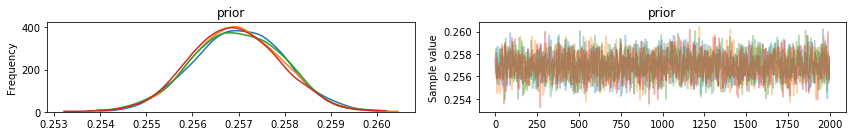

In [4]:
pymc3.traceplot(trace)

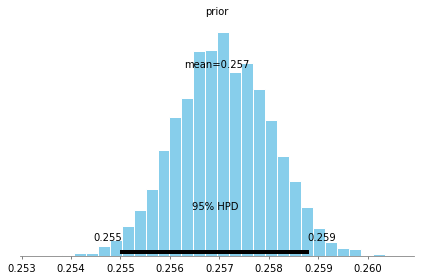

In [5]:
pymc3.plot_posterior(trace)

In [6]:
#the above results for the posterior looks really like what we got analytically!
#bonus here: we can get to sample from the predictive posterior quite easily too!

In [7]:
sampled_posterior_predictive['likelihood'].shape

(500, 70489)

(array([7.0483e+04, 3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00004482e-01, 2.85125026e+15, 5.70250052e+15, 8.55375078e+15,
        1.14050010e+16, 1.42562513e+16, 1.71075016e+16, 1.99587518e+16,
        2.28100021e+16, 2.56612523e+16, 2.85125026e+16]),
 <a list of 10 Patch objects>)

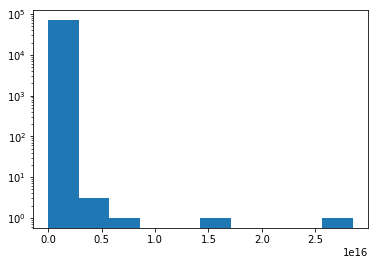

In [8]:
plt.hist(sampled_posterior_predictive['likelihood'][1], log=True)